## BME i9400
## Fall 2025
### Convolutional Neural Networks

## Introduction
- In previous lectures, we covered vanilla neural networks: multilayer perceptrons
- The building blocks of MLPs are *fully connected layers*
- Before introducing convolutional networks, let's define a fully connected layer, as it will be used later in the lecture

## Fully connected layer
- A fully connected layer is a layer in a neural network where each neuron is connected to every neuron in the previous layer
- The output of a fully connected layer is computed as:
---
$y = \sigma(Wx + b)$

---
where:
- $y$ is the output of the layer (generally a vector)
- $\sigma$ is the activation function
- $W$ is the weight matrix
- $x$ is the input vector

## Fully connected layer
<img src="img/dense2.png" alt="ANN Diagram" width="600"/>

## Convolutional Neural Networks (CNNs)
- Convolutional Neural Networks (CNNs) are a class of neural networks that are particularly well-suited for processing data with *spatial* or *temporal* structure
- Examples in biomedical engineering:
    - Medical image analysis
    - ECG/EEG signal processing
    - Protein structure prediction
    - Drug discovery


## Convolution in 1-D
- As the name suggests, the fundamental operation in CNNs is *convolution*
- Convolution is a mathematical operation between two signals
    - One of these signals may be viewed as the input, and the second as a filter
    - NB: the "filter" is often referred to as a "kernel" in the context of CNNs
    - Convolving the input with the filter produces an output signal (a third signal)
- In 1-dimension, convolutions are often thought of as a temporal filtering operation:
---
$y(t) = (x * w)(t) = \sum_{a=-\infty}^{\infty} x(a)w(t-a)$

---
where $x$ is the input signal, $w$ is the filter, and $y$ is the output signal


## Convolution in 2-D
- In 2 dimensions, the convolution operation is defined as:
---
$y(i,j) = (x * w)(i,j) = \sum_m \sum_n x(m,n)w(i-m,j-n)$

---
where $x$ is the 2-D input image (a 2-D image), $w$ is the 2-D filter, and $y$ is the output image.
- Convolution in 2-D may be thought of as sliding the filter over the input image, and computing the dot product at each location
- The output image is typically smaller than the input image
- One example of a filter is the Sobel filter, which is used for edge detection


## Demonstrating convolution in 1-D
- Without any further ado, let's demonstrate convolution in 1-D (super exciting, I know!)
- Good news: ```numpy``` provides a function for convolution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Convolution Example
def conv1d(signal, kernel):
    return np.convolve(signal, kernel, mode='valid')

# Create a sample signal and kernel
t = np.linspace(0, 10, 1000)
signal = np.sin(2*np.pi*t) + np.random.normal(0, 0.1, len(t))
kernel = np.ones(50)/50  # Moving average filter

# Apply convolution
filtered_signal = conv1d(signal, kernel)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t[:len(filtered_signal)], filtered_signal, label='Filtered')
plt.plot(t[:len(filtered_signal)], signal[:len(filtered_signal)], alpha=0.5, label='Original')
plt.title('1D Convolution Example')
plt.legend()
plt.show()

## Demonstrating 2-D convolutions
- To demonstrate convolution in 2-D, we will use the ```scipy``` package to create a simple image and apply a 2-D convolution
- We will use a simple edge detection kernel

In [ ]:
from scipy import signal

# Create a sample image
image = np.zeros((10, 10))
image[4:7, 4:7] = 1

# Create an edge detection kernel
kernel = np.array([[-1, -1, -1],
                  [-1,  8, -1],
                  [-1, -1, -1]])

# Apply 2D convolution
conv_result = signal.convolve2d(image, kernel, mode='valid')

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.imshow(image, cmap='hot', vmin=-1, vmax=1)
ax1.set_title('Original Image')
plt.colorbar(ax1.imshow(image, cmap='hot', vmin=-1, vmax=1), ax=ax1)
ax2.imshow(conv_result, cmap='hot', vmin=-1, vmax=1)
ax2.set_title('After Convolution')
plt.colorbar(ax2.imshow(conv_result, cmap='hot', vmin=-1, vmax=1), ax=ax2)
plt.show()



In [ ]:
# plot the original image and the filtered image BOTH USING SEABORN HEATMPA AND BOTH USING ANNOTATIONS
# DO NOT MESS THIS UP
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.imshow(image, cmap='hot', vmin=-1, vmax=1)
ax1.set_title('Original Image')
sns.heatmap(image, cmap='hot', vmin=-1, vmax=1, annot=True, fmt='.1f', ax=ax1)
ax2.imshow(conv_result, cmap='hot', vmin=-1, vmax=1)
ax2.set_title('After Convolution')
sns.heatmap(conv_result, cmap='hot', vmin=-1, vmax=1, annot=True, fmt='.1f', ax=ax2)
plt.show()


## Why Use Convolutions in Neural Networks?
1. Weight Sharing
   - Same kernel is applied across the entire input
   - Reduces number of parameters
   - Translation invariance

2. Local Features
   - Each output value depends only on nearby input values
   - Captures spatial relationships
   - Hierarchical feature learning

## 1D Convolutional Layers
- Used for processing *sequential* data
- The filter slides across the input, computing an output at each location (see below)
- Examples in biomedical engineering:
    - ECG signals
    - EEG recordings
    - Blood pressure time series

## 1D Convolutional Layer
<img src="img/conv1d.jpeg" alt="1D Convolution" width="600"/>

## 2D Convolutional Layers
- Used for processing image data
- The filter slides across the input image (moves left to right, as well as top to bottom), computing an output at each location
- Examples in biomedical engineering:
    - X-ray images
    - MRI scans
    - Histology slides
    - Microscopy images


## 2D Convolutional Layer
<img src="img/conv2d.jpeg" alt="2D Convolution" width="600"/>

## Pooling Layers
- Convolutions are almost always paired with *pooling*
    - Pooling means that we reduce the value of a region of the input to a single value
- Types:
    - Max pooling (most common): take the maximum value in the region
    - Average pooling: take the average value in the region
- Benefits:
    - Reduces computation
    - Provides some translation invariance
    - Helps prevent overfitting

## Max pooling example
<img src="img/pooling.jpeg" alt="Max Pooling" width="600"/>

## Striding
- Controls how the kernel moves across the input
- A stride of 1 means that the kernel moves one pixel at a time
- Larger stride = reduced output size
- Can be used instead of or in addition to pooling

## Note to self: in the image below, the Stride=1 panel assumes a 2x2 kernel, NOT 3x3

## Striding
<img src="img/strides.jpeg" alt="Striding" width="600"/>

## Applications of CNNs in Biomedical Engineering
1. 1D CNNs:
   - ECG classification
   - Sleep stage scoring
   - Seizure detection

2. 2D CNNs:
   - Medical image segmentation
   - Disease classification
   - Cell detection

3. 3D CNNs:
   - Volumetric medical imaging (CT, MRI)
   - Drug-protein interaction prediction
   - Motion analysis in medical videos

## Demonstrating 2-D CNNs in PyTorch
- Let's create a simple CNN model in PyTorch
- We will work with the popular MNIST dataset of handwritten digits
- The goal of the model is to classify the digits into one of 10 classes (0-9)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the CNN
class SimpleCNN(nn.Module): # defining a model that we will call SimpleCNN -- it will inherit from nn.Module
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=(5,5)) # 1 input "channel", 10 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(10, 20, kernel_size=(5,5)) # 10 input channels, 20 output channels, 5x5 kernel
        self.pool = nn.MaxPool2d(2) # 2x2 max pooling
        self.fc = nn.Linear(320, 10) # Fully connected layer
        
    #def forward(self, x):
    #    x = self.pool(torch.relu(self.conv1(x)))
    #    x = self.pool(torch.relu(self.conv2(x)))
    #    x = x.view(-1, 320)
    #    return self.fc(x)

    def forward(self, x):

        ## convolutional layer 1
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)

        ## convolutional layer 2
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.pool(x)

        ## flattening   
        x = x.view(-1, 320)

        ## fully connected layer
        x = self.fc(x)
        return x

## Loading the MNIST dataset in Python
- We will use the ```torchvision``` package to load the MNIST dataset
- The dataset consists of 60,000 training images and 10,000 test images
- Each image is a 28x28 pixel grayscale image
- The images are labeled with the corresponding digit (0-9)
- We will use a batch size of 64 for training

In [23]:
## Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

Text(0.5, 1.0, 'Label: 5')

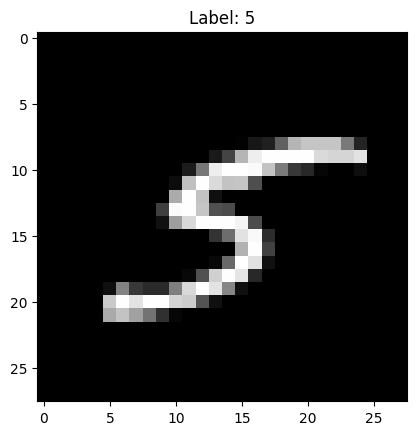

In [27]:
# display a sample image
import matplotlib.pyplot as plt
plt.imshow(train_dataset[523][0].squeeze(), cmap='gray')
plt.title(f'Label: {train_dataset[523][1]}')

## Instantiate the model, loss function, and optimizer

In [20]:
# Initialize model, loss function, and optimizer
model = SimpleCNN()

# Show per-layer input/output shapes using a dummy MNIST-sized batch
example_input = torch.randn(1, 1, 28, 28)
print(f"Model input shape: {tuple(example_input.shape)}")

hooks = []

def print_io_shapes(module, inp, out):
    inp_shape = tuple(inp[0].shape) if isinstance(inp, (list, tuple)) else tuple(inp.shape)
    out_shape = tuple(out.shape)
    print(f"{module.__class__.__name__}: {inp_shape} -> {out_shape}")

for layer in model.children():
    hooks.append(layer.register_forward_hook(print_io_shapes))

with torch.no_grad():
    output = model(example_input)

for h in hooks:
    h.remove()

print(f"Model output shape: {tuple(output.shape)}")


Model input shape: (1, 1, 28, 28)
Conv2d: (1, 1, 28, 28) -> (1, 10, 24, 24)
MaxPool2d: (1, 10, 24, 24) -> (1, 10, 12, 12)
Conv2d: (1, 10, 12, 12) -> (1, 20, 8, 8)
MaxPool2d: (1, 20, 8, 8) -> (1, 20, 4, 4)
Linear: (1, 320) -> (1, 10)
Model output shape: (1, 10)


In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## Defining a training function
- To make the code modular, let's define a function for training the model
- The function will take the following arguments:
    - The model object
    - The training dataloader object
    - The optimizer object
    - The epoch index

In [29]:
# Training function
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data) # make a prediction
        loss = criterion(output, target) # compute the loss
        loss.backward() # compute the gradients
        optimizer.step() # update the model parameters
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

## Defining a test function
- Similarily, let's define a function for testing the model
- Instead of performing gradient descent and updating the model parameters, this function will be tasked with making predictions on the test set and measuring the performance

In [30]:
# Test function
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, '
          f'Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({100. * correct / len(test_loader.dataset):.2f}%)\n')

## Training and evaluating the model
- In the following code block, we will train the model for 3 epochs
- At the end of each epoch, we will evaluate the model on the test set and report the accuracy

In [31]:
# Train the model for 3 epochs
for epoch in range(1, 4):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.308833
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.317974
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.352311
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.302690
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.320212
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.148844
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.126616
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.108536
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.126598
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.165842

Test set: Average loss: 0.0001, Accuracy: 9596/10000 (95.96%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.072947
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.144156
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.058906
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.047823
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.174106
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.026996
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.087614
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.089711
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.04248